## Facial emotion recognition:Using FER dataset

Prepare and split the FER2013 dataset. Preprocess by resizing images to 48x48 pixels, normalize pixel values, and apply data augmentation. Select a CNN architecture, train with categorical crossentropy loss and Adam optimizer, evaluating with metrics. Fine-tune based on results, then seamlessly integrate for Facial Emotion Recognition in real-world applications. 

Table of contents:

1. Importing necessary libraries

2. Loading the data

3. Data pre-processing

4. Design a model

5. Fine tuning

6. Evaluate the model

7. Redesign a model using Dropout, Batch Normalizationa and Datagen

5. Fine tuning

6. Evaluate the model

#### Import libraries

In [75]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the FER Dataset

In [76]:
# Load the FER2013 dataset
df = pd.read_csv('fer2013.csv')


In [77]:
#check target labels
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = df['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Digust,547
2,Fear,5121
3,Happy,8989
4,Sad,6077
5,Surprise,4002
6,Neutral,6198


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


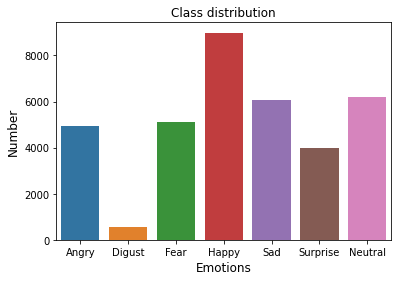

In [78]:
# Plotting a bar graph of the class distributions
plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

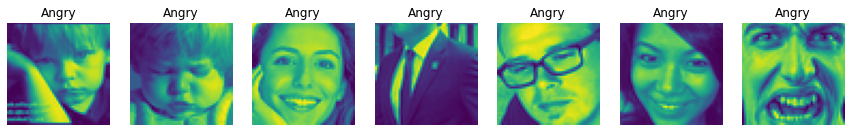

In [79]:
plt.figure(figsize=(15,23))
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
i = 1
for i in range (7):
    img = np.squeeze(X_train[i])
    plt.subplot(1,7,i+1)
    plt.imshow(img)
    index = np.argmax(y_train[i])
    plt.title(label_dict[index])
    plt.axis('off')
    i += 1
plt.show()

In [80]:
# Preprocess the data
pixels = df['pixels'].tolist()
X = np.array([np.fromstring(pixel, dtype=int, sep=' ').reshape(48, 48, 1) for pixel in pixels])
X = X / 255.0  # Normalize pixel values to be between 0 and 1
y = df['emotion'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Build the CNN model

In [81]:
# Build the CNN model
model_original = models.Sequential()
model_original.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model_original.add(layers.MaxPooling2D((2, 2)))
model_original.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_original.add(layers.MaxPooling2D((2, 2)))
model_original.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_original.add(layers.MaxPooling2D((2, 2)))
model_original.add(layers.Flatten())
model_original.add(layers.Dense(128, activation='relu'))
model_original.add(layers.Dense(7, activation='softmax'))  # 7 classes for 7 emotions

# Compile the original model
model_original.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the original model
# can increase the epochs for better results
history_original = model_original.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
898/898 [==============================] - 40s 44ms/step - loss: 1.6684 - accuracy: 0.3346 - val_loss: 1.5030 - val_accuracy: 0.4331
Epoch 2/15
898/898 [==============================] - 36s 40ms/step - loss: 1.4006 - accuracy: 0.4611 - val_loss: 1.3249 - val_accuracy: 0.4923
Epoch 3/15
898/898 [==============================] - 36s 40ms/step - loss: 1.2724 - accuracy: 0.5149 - val_loss: 1.2621 - val_accuracy: 0.5195
Epoch 4/15
898/898 [==============================] - 36s 40ms/step - loss: 1.1915 - accuracy: 0.5454 - val_loss: 1.2246 - val_accuracy: 0.5361
Epoch 5/15
898/898 [==============================] - 35s 39ms/step - loss: 1.1290 - accuracy: 0.5719 - val_loss: 1.2106 - val_accuracy: 0.5380
Epoch 6/15
898/898 [==============================] - 35s 40ms/step - loss: 1.0700 - accuracy: 0.5965 - val_loss: 1.2064 - val_accuracy: 0.5527
Epoch 7/15
898/898 [==============================] - 35s 39ms/step - loss: 1.0181 - accuracy: 0.6160 - val_loss: 1.1900 - val_accuracy:

#### Build the CNN model with Dropout and Batch Normalization

In [82]:
# Build the CNN model with Dropout and Batch Normalization
model_augmented = models.Sequential()
model_augmented.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model_augmented.add(layers.BatchNormalization())
model_augmented.add(layers.MaxPooling2D((2, 2)))
model_augmented.add(layers.Dropout(0.25))

model_augmented.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_augmented.add(layers.BatchNormalization())
model_augmented.add(layers.MaxPooling2D((2, 2)))
model_augmented.add(layers.Dropout(0.25))

model_augmented.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_augmented.add(layers.BatchNormalization())
model_augmented.add(layers.MaxPooling2D((2, 2)))
model_augmented.add(layers.Dropout(0.25))

model_augmented.add(layers.Flatten())
model_augmented.add(layers.Dense(128, activation='relu'))
model_augmented.add(layers.BatchNormalization())
model_augmented.add(layers.Dropout(0.5))
model_augmented.add(layers.Dense(7, activation='softmax'))



In [83]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [84]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



In [85]:
# Compile the augmented model
model_augmented.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the augmented model with data augmentation
history_augmented = model_augmented.fit(datagen.flow(X_train, y_train, batch_size=32),
                              epochs=15,
                              validation_data=(X_test, y_test))


Epoch 1/15
898/898 [==============================] - 68s 74ms/step - loss: 2.0940 - accuracy: 0.2183 - val_loss: 1.7337 - val_accuracy: 0.2838
Epoch 2/15
898/898 [==============================] - 68s 75ms/step - loss: 1.7877 - accuracy: 0.2666 - val_loss: 1.9045 - val_accuracy: 0.2467
Epoch 3/15
898/898 [==============================] - 67s 75ms/step - loss: 1.7127 - accuracy: 0.3113 - val_loss: 1.6475 - val_accuracy: 0.3275
Epoch 4/15
898/898 [==============================] - 66s 74ms/step - loss: 1.6454 - accuracy: 0.3460 - val_loss: 1.5411 - val_accuracy: 0.4167
Epoch 5/15
898/898 [==============================] - 66s 74ms/step - loss: 1.5976 - accuracy: 0.3700 - val_loss: 1.8845 - val_accuracy: 0.2428
Epoch 6/15
898/898 [==============================] - 61s 68ms/step - loss: 1.5573 - accuracy: 0.3912 - val_loss: 1.3550 - val_accuracy: 0.4896
Epoch 7/15
898/898 [==============================] - 61s 68ms/step - loss: 1.5299 - accuracy: 0.4000 - val_loss: 1.3855 - val_accuracy:

#### Evaluate the models for training set, validation set and test set

In [86]:
# Evaluate the models on the training set, validation set, and test set
train_loss_original, train_acc_original = model_original.evaluate(X_train, y_train)
val_loss_original, val_acc_original = model_original.evaluate(X_test, y_test)
test_loss_original, test_acc_original = model_original.evaluate(X_test, y_test)

train_loss_augmented, train_acc_augmented = model_augmented.evaluate(X_train, y_train)
val_loss_augmented, val_acc_augmented = model_augmented.evaluate(X_test, y_test)
test_loss_augmented, test_acc_augmented = model_augmented.evaluate(X_test, y_test)


225/225 [==============================] - 5s 20ms/step - loss: 1.4512 - accuracy: 0.4496


#### Plot the result

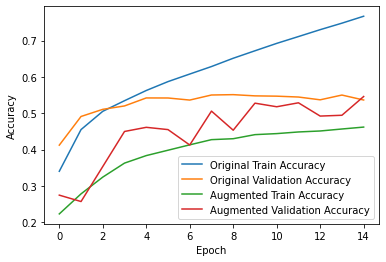

In [19]:
# Plot the comparison of accuracies
plt.plot(history_original.history['accuracy'], label='Original Train Accuracy')
plt.plot(history_original.history['val_accuracy'], label='Original Validation Accuracy')
plt.plot(history_augmented.history['accuracy'], label='Augmented Train Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Evaluate the models on the test set
test_loss_original, test_acc_original = model_original.evaluate(X_test, y_test)
test_loss_augmented, test_acc_augmented = model_augmented.evaluate(datagen.flow(X_test, y_test, batch_size=32))


225/225 [==============================] - 5s 21ms/step - loss: 1.3476 - accuracy: 0.4852


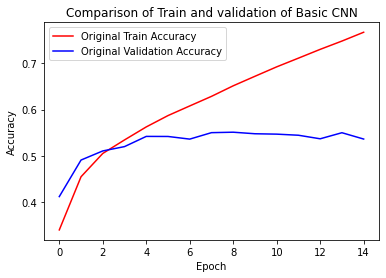

In [70]:
plt.plot(history_original.history["accuracy"],'r',label="Original Train Accuracy")
plt.plot(history_original.history['val_accuracy'],'b' ,label='Original Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and validation of Basic CNN')
plt.legend()
plt.show()

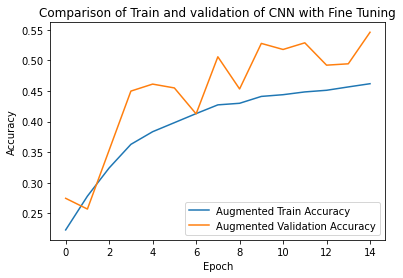

In [71]:
plt.plot(history_augmented.history['accuracy'], label='Augmented Train Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and validation of CNN with Fine Tuning')
plt.legend()
plt.show()

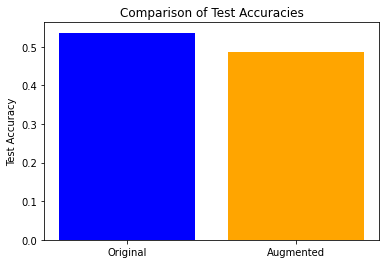

In [27]:
# Plot the comparison of test accuracies
plt.bar(['Original', 'Augmented'], [test_acc_original, test_acc_augmented], color=['blue', 'orange'])
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracies')
plt.show()

#### Plot the result

In [60]:
num_images_to_show = 5
selected_indices = np.random.choice(len(X_test), num_images_to_show, replace=False)
selected_images = X_test[selected_indices]
selected_labels_true = y_test[selected_indices]

In [61]:
# Make predictions
predictions = model_original.predict(selected_images)
selected_labels_pred = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 30ms/step


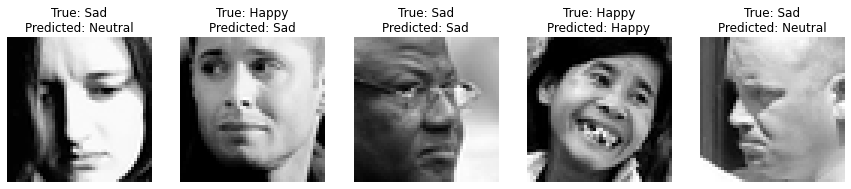

In [62]:
# Display the images with true and predicted labels
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plt.figure(figsize=(15, 8))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(selected_images[i].reshape(48, 48), cmap='gray')
    plt.title(f'True: {class_names[selected_labels_true[i]]}\nPredicted: {class_names[selected_labels_pred[i]]}')
    plt.axis('off')

plt.show()

In [66]:
num_images_to_show = 5
selected_indices = np.random.choice(len(X_test), num_images_to_show, replace=False)
selected_images = X_test[selected_indices]
selected_labels_true = y_test[selected_indices]

In [67]:
# Make predictions
predictions = model_augmented.predict(selected_images)
selected_labels_pred = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 32ms/step


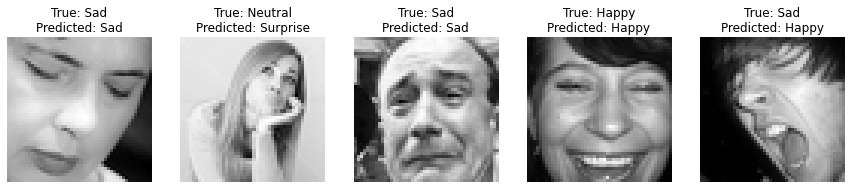

In [68]:
# Display the images with true and predicted labels
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plt.figure(figsize=(15, 8))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(selected_images[i].reshape(48, 48), cmap='gray')
    plt.title(f'True: {class_names[selected_labels_true[i]]}\nPredicted: {class_names[selected_labels_pred[i]]}')
    plt.axis('off')

plt.show()
